In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.utils import shuffle


## preparing data 

In [91]:
df=pd.read_csv('C:/Users/alise/Dropbox/Programming/Machine learning in physics- 2021/Project/Success in movies/Machine-learning-in-physics-Project/Phase 1-Data Collection/Data/final data set.csv',index_col=0)
df.drop(['additive Producer(s) rank',
'additive Director(s) rank',
'additive Writer(s) rank',
'additive Stars rank',
'additive Distributor rank','IMDB score','IMDB votes',
'Mojo ID','Opening ($)','In Realease (Days)',
'Widest Release','Metascore','User',
'Critic'],axis=1,inplace=True)

df.fillna(df.median(),inplace=True)

df.drop('Year',axis=1,inplace=True)


X=df.drop('Domestic Gross ($)',axis=1).to_numpy()
Y=df['Domestic Gross ($)'].to_numpy()
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X,Y=shuffle(X,Y)
#Y=np.log10(Y)


fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].hist(Y,bins=200)
ax[0].set_xlabel('Domestic Gross ($)')
ax[0].set_ylabel('p')

pca=PCA()
pca.fit(X)

ax[1].plot(np.cumsum(pca.explained_variance_ratio_))
ax[1].set_xlabel('number of components')
ax[1].set_ylabel('cumulative explained variance')
plt.show()

ValueError: could not convert string to float: 'tt0499549'

In [92]:
df=pd.read_csv('C:/Users/alise/Dropbox/Programming/Machine learning in physics- 2021/Project/Success in movies/Machine-learning-in-physics-Project/Phase 1-Data Collection/Data/final data set.csv',index_col=0)
df.drop(['additive Producer(s) rank',
'additive Director(s) rank',
'additive Writer(s) rank',
'additive Stars rank',
'additive Distributor rank','IMDB score','IMDB votes',
'Mojo ID','Opening ($)','In Realease (Days)',
'Widest Release','Metascore','User',
'Critic'],axis=1,inplace=True)

In [95]:
for item in df.columns:
    print(item)

IMDB ID
Year
Budget
Opening Theaters
Running time (min)
genre Action
genre Adventure
genre Fantasy
genre Sci-Fi
genre Animation
genre Comedy
genre Family
genre Drama
genre Romance
genre Thriller
genre Mystery
genre Crime
genre Sport
genre Musical
genre Documentary
genre History
genre Music
genre Biography
genre Horror
genre War
genre Western
genre Short
genre News
genre Film-Noir
genre Reality-TV
genre Adult
MPAA PG-13
MPAA PG
MPAA R
MPAA G
MPAA Unrated
MPAA NC-17
MPAA Not Rated
MPAA M/PG
MPAA TV-PG
Day
Month
language English
language French
language Swedish
language Spanish
language Italian
language Hindi
language Hebrew
language German
language Arabic
language Korean
language None
language Mandarin
language Finnish
language Japanese
language Danish
language Vietnamese
language Portuguese
language Persian
language Greek
language Cantonese
language Serbian
language Norwegian
language Romanian
language Zulu
language Turkish
language Estonian
language Dutch
language Russian
language Cata

In [170]:
dic_classification={}

In [106]:
dic_classification

{'big success',
 'blockbuster',
 'box office bomb',
 'flop',
 'great success',
 'hit',
 'minor success_1',
 'minor_success_2',
 'other',
 'super hit'}

In [171]:
dic_classification['super hit']=df.loc[(df['Budget']>50e6) & (df['Budget']*4<=df['Worldwide Gross ($)'])].index

dic_classification['blockbuster']=df.loc[(df['Budget']>50e6) & (df['Budget']*4>df['Worldwide Gross ($)']) & (df['Budget']*2.5<=df['Worldwide Gross ($)'])].index

dic_classification['minor success']=df.loc[(df['Budget']>50e6) & (df['Budget']*2.5>df['Worldwide Gross ($)']) & (df['Budget']*1.5<=df['Worldwide Gross ($)'])].index

dic_classification['flop']=df.loc[(df['Budget']>50e6) & (df['Budget']*1.5>df['Worldwide Gross ($)']) & (df['Budget']<=df['Worldwide Gross ($)'])].index

dic_classification['box office bomb'] = df.loc[(df['Budget']>50e6) & (df['Budget']>df['Worldwide Gross ($)'])].index


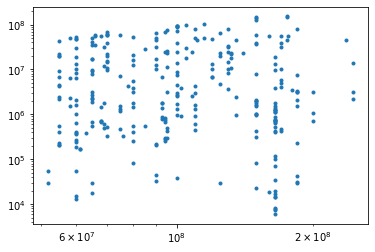

In [175]:
x=df.loc[dic_classification['box office bomb']]['Budget']
y=df.loc[dic_classification['box office bomb']]['Worldwide Gross ($)']
plt.plot(x,y,'.')
plt.xscale('log')
plt.yscale('log')

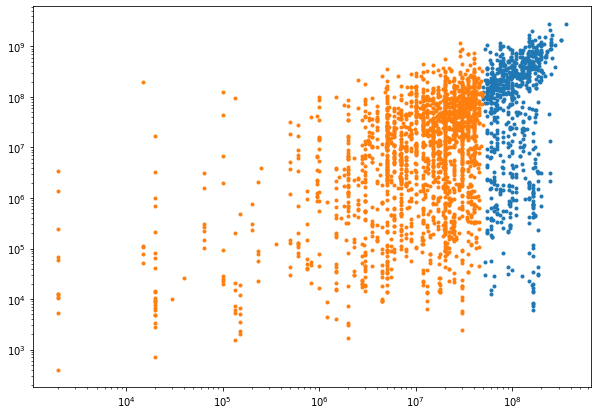

In [176]:
plt.figure(figsize=(10,7))
x=df['Budget']
y=df['Worldwide Gross ($)']
plt.plot(x[x>50e6],y[x>50e6],'.')
plt.plot(x[x<50e6],y[x<50e6],'.')
plt.xscale('log')
plt.yscale('log')

In [79]:
sum(df['Budget']>50e6)

731

In [80]:
sum(df['Budget']<50e6)


6299

In [21]:
x,y=np.unique(Y,return_counts=True)

In [64]:
minn=min(x)
maxx=max(x)
group = 5
const = (maxx/minn)**(1/group)
bining=[(const**i)*minn for i in range(group+1) ]
hist=np.zeros(len(bining)-1)
counter=0
for index,item in enumerate(x):
    while counter<len(bining)-1:
        if item>=bining[counter] and item<bining[counter+1]:
            hist[counter]+=y[index]
            break 
        counter+=1
mean=np.array([(bining[i]+bining[i+1])/2 for i in range(len(bining)-1)])

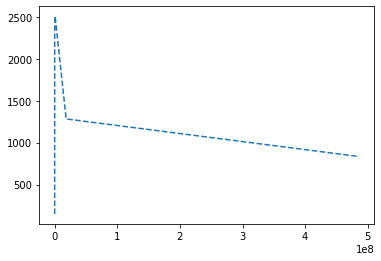

In [67]:
plt.plot(mean,hist,'--')

(array([ 149., 2321., 2509., 1283.,  834.]),
 array([7.20000000e+01, 1.90626203e+03, 5.04699297e+04, 1.33623487e+06,
        3.53779696e+07, 9.36662225e+08]),
 <BarContainer object of 5 artists>)

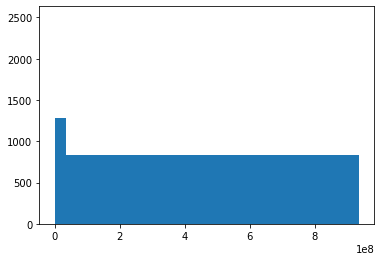

In [72]:
plt.hist(Y,bins=bining)
#plt.show()

In [73]:
bining[-1]

936662225.0000012

In [74]:
Y[-1]

4535154.0